<a href="https://colab.research.google.com/github/pragyakhanna11/K-means-clustering/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/img.jpeg")

In [ ]:
img.shape

(412, 549, 3)

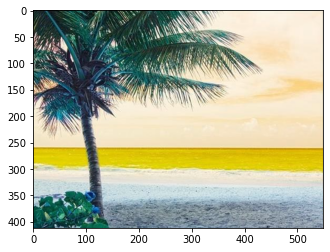

In [7]:
plt.imshow(img)

In OpenCV when we read an image it's in BGR instead of RGB

In [9]:
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

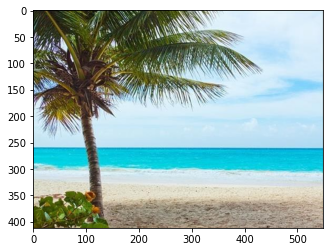

In [10]:
plt.imshow(img2)

Now we convert the MxNx3 image into a Kx3 matrix where K=MxN 

In [11]:
vectorized = img2.reshape((-1,3))

In [12]:
vectorized.shape

(226188, 3)

In [15]:
vectorized.dtype

dtype('uint8')

We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.

[For mor info!](https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html)

In [16]:
vectorized = np.float32(vectorized)

In [17]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

**criteria**: It is the iteration termination criteria. When this criterion is satisfied, the algorithm iteration stops. Actually, it should be a tuple of 3 parameters.\
 They are `( type, max_iter, epsilon )`:
Type of termination criteria.\
It has 3 flags as below:
- cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
- cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
- cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.

In [18]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 

- nclusters(K): Number of clusters required at the end
- attempts: Flag to specify the number of times the algorithm is executed using different initial labelings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.
- flags: This flag is used to specify how initial centers are taken. Normally two flags are used for this: cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

- ret: SSE for each point to corresponding centre
- label: the K labels
- centre: centre of each cluster


In [19]:
center = np.uint8(center)

In [24]:
res = center[label.flatten()]
result_image = res.reshape((img2.shape))

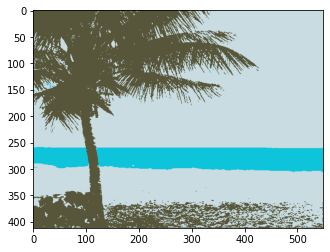

In [25]:
plt.imshow(result_image)